In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
df = pd.read_csv('Salary_dataset.csv')

# Inspect the data

In [3]:
print("Dataset Shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

Dataset Shape: (30, 3)
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes
None
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.00

# Check for missing values

In [4]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

Missing values per column:
 Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

Total missing values: 0


# Since there are no missing values, we can just split the dataset into features(X) and target(Y)

In [5]:
X = df[['YearsExperience']].values  # Feature (2D array for sklearn)
y = df['Salary'].values             # Target (1D array)

# Fit into Linear Regression Model

In [6]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Make predictions

In [7]:
y_pred = model.predict(X)

# Calculate metrics

In [8]:
r_squared = model.score(X, y)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

# Addition of predictions in dataframe for displaying

In [9]:
df['Predicted_Salary'] = y_pred

# Print Results

In [10]:
print("Linear Regression Results (sklearn):")
print(f"Intercept (beta_0): {model.intercept_:.2f}")
print(f"Slope (beta_1): {model.coef_[0]:.2f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print("\nSample Data with Predictions (First 5 rows):")
print(df.head())

Linear Regression Results (sklearn):
Intercept (beta_0): 24848.20
Slope (beta_1): 9449.96
R-squared: 0.9570
Mean Squared Error (MSE): 31270951.72
Root Mean Squared Error (RMSE): 5592.04
Mean Absolute Error (MAE): 4644.20

Sample Data with Predictions (First 5 rows):
   Unnamed: 0  YearsExperience   Salary  Predicted_Salary
0           0              1.2  39344.0      36188.158752
1           1              1.4  46206.0      38078.151217
2           2              1.6  37732.0      39968.143681
3           3              2.1  43526.0      44693.124842
4           4              2.3  39892.0      46583.117306


# Save predictions to csv

In [11]:
df.to_csv('Salary_Predictions_sklearn.csv', index=False)
print("\nPredictions saved to 'Salary_Predictions_sklearn.csv'")


Predictions saved to 'Salary_Predictions_sklearn.csv'


# Visualization of Regression Line

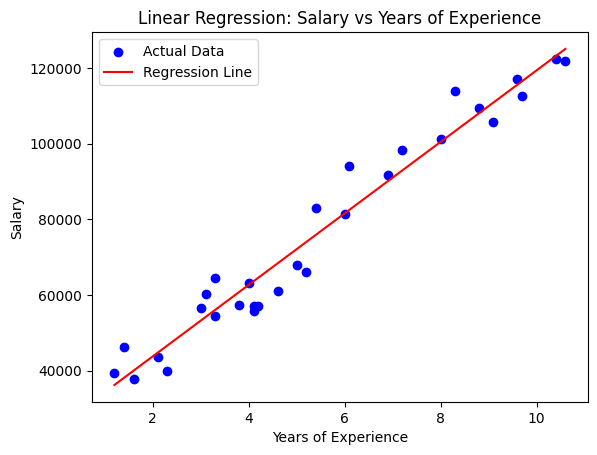

In [12]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs Years of Experience')
plt.legend()
plt.savefig('regression_plot.png')
plt.show()